In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import folium
from folium.plugins import HeatMap

### Load data

In the data dive folder the prepared data is grouped by district name.  In order to load data from folder, start typing folder name in quotes like **"Nagornyj/"** and after that press Tab button to see files stored in a folder. 
First, load the following:

#### Load district boundary

In [3]:
district = gpd.read_file('./Horoshevo-Mnevniki/Horoshevo-Mnevniki_districts.geojson')

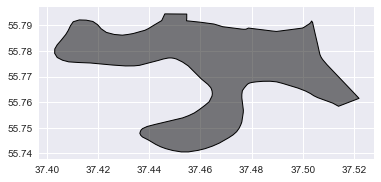

In [4]:
district.plot()

#### Load google places

In [5]:
google_places = gpd.read_file('./Horoshevo-Mnevniki/Horoshevo-Mnevniki_google_places.geojson')

In [6]:
google_places.head()

,geometry,id,lat,lon,name,newtype,type
0,POINT (37.454431 55.794116),ChIJvedpqvZItUYRibeZ0hP8tf4,55.794116,37.454431,Ulitsa Rogova,Transportation & logistics,transit_station
1,POINT (37.454254 55.794234),ChIJ-_3zAfRItUYRjVR5P7Rb9nY,55.794234,37.454254,Ulitsa Rogova,Transportation & logistics,light_rail_station
2,POINT (37.454581 55.794234),ChIJL6zuqfZItUYR1ceGDQoD5fY,55.794234,37.454581,Ulitsa Rogova,Transportation & logistics,bus_station
3,POINT (37.44810310000001 55.79384),ChIJNRCApvNItUYR9whHds8ZzNQ,55.793840,37.448103,Atom-sport Rossiyskoye Fizkulturno-sportivnoye...,Outdoor spaces,point_of_interest
4,POINT (37.44810310000001 55.79384),ChIJQzF2zfNItUYRI0YwvZqlHSM,55.793840,37.448103,Denisport,Health & beauty,gym


#### Group google places by column **newtype** and draw the barplot. What are the most frequent venues?

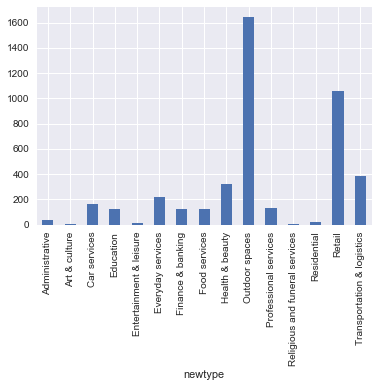

In [7]:
google_places.groupby('newtype', sort=True).size().plot(kind='bar')

In [8]:
google_places.newtype.value_counts()

Outdoor spaces                    1641
Retail                            1056
Transportation & logistics         387
Health & beauty                    320
Everyday services                  216
Car services                       163
Professional services              128
Food services                      123
Finance & banking                  120
Education                          120
Administrative                      37
Residential                         18
Entertainment & leisure             14
Religious and funeral services       6
Art & culture                        2
Name: newtype, dtype: int64

Great. Now you know something about google places but we are interested in spatial distribution of these places across a given district. 

### Plot Maps

Before plotting the objects on the map, we need to define the base layer. Folium requires the initial point to create the map. The initial point will be the center of your district. Extract the centroid of your polygon and fill the coordinates below:

In [7]:
center_lat = list(district.centroid[0].coords)[0][1]
center_lon = list(district.centroid[0].coords)[0][0]

#### Plot the base layer

In [8]:
map_places = folium.Map([center_lat, center_lon], tiles='cartodb positron', zoom_start=14,control_scale=True)
map_places

#### Add to the map khrushchevki locations and district boundary

In [9]:
houses = gpd.read_file('./Horoshevo-Mnevniki/Horoshevo-Mnevniki_chruchevki.geogson')

In [39]:
houses.head()

,area,area_land,area_live,area_nonlive,area_parking,critical_conditions,geometry,house_id,house_type,id,...,playground,room_nonresidential_count,room_residential_count,room_total_count,service_day,service_last_date,service_month,service_year,sportground,year
0,4017.8,4986.0,3339.7,678.1,863.0,0.0,POINT (37.460161 55.778796),7581086,apartment house,7117,...,1.0,3.0,80.0,83.0,27.0,27.12.2011,12.0,2011.0,1.0,1960.0
1,4761.9,4277.0,3484.1,1277.8,162.2,0.0,POINT (37.460969 55.778659),7581093,apartment house,7118,...,1.0,0.0,79.0,79.0,27.0,27.12.2011,12.0,2011.0,0.0,1960.0
2,3827.6,3609.0,3212.6,615.0,NaN,0.0,POINT (37.460762 55.780011),7581101,apartment house,7119,...,NaN,NaN,NaN,75.0,NaN,None,NaN,NaN,NaN,1962.0
3,3203.2,5299.0,3161.8,41.4,NaN,0.0,POINT (37.460089 55.780122),7581110,apartment house,7120,...,NaN,NaN,NaN,75.0,NaN,None,NaN,NaN,NaN,1962.0
4,4231.6,4547.0,3501.9,729.7,85.0,0.0,POINT (37.461589 55.779914),7581133,apartment house,7121,...,1.0,7.0,80.0,87.0,23.0,23.01.2017,1.0,2017.0,1.0,1959.0


In [14]:
map_places = folium.Map([center_lat, center_lon], tiles='cartodb positron', zoom_start=14,control_scale=True)

#Define style for geojson objects
style_function = lambda feature: dict(fillColor='#AECCAE',
                                      color='#AECCAE',
                                      weight=1,
                                      opacity=0.3)

points = folium.features.GeoJson(houses,name='Khurshevki houses')
polygon = folium.features.GeoJson(district, style_function=style_function,name='district boundary')

#adding points to the map
map_places.add_child(points,name='Khurshevki houses')
map_places.add_child(polygon,name='district boundary')

#Switch between layers
folium.LayerControl().add_to(map_places)
map_places

In [41]:

houses.plot(column='service_year',ax=base, cmap='Blues', scheme='Quantiles',legend=True);

NameError: name 'base' is not defined

As you know your popular venue categories, you can plot the as a heatmap. Choose the venue categories and write them to the list

In [36]:
transport = google_places[google_places['newtype'] == 'Transportation & logistics']
retail = google_places[google_places['newtype'] == 'Retail']

transport_coords = list(zip(transport.lat, transport.lon))
retail_coords = list(zip(retail.lat, retail.lon))

In [37]:
map_places = folium.Map([center_lat, center_lon], tiles='cartodb positron', zoom_start=14,control_scale=True)


colormap = {0.0: 'pink', 0.3: 'blue', 0.5: 'green',  1.0: 'red'}


HeatMap(transport_coords,
        name='transport',
        radius=10, 
        min_opacity=0.8,
       gradient={0.0: 'pink', 0.3: 'blue', 0.5: 'green',  1.0: 'red'}).add_to(map_places)

HeatMap(retail_coords,
        name='retail',
        radius=13, 
        min_opacity=0.8,
       gradient={.0: 'white', .2: '#E0EEE0', .4: '#C1CDC1', .6: '#838B83', .8:'#C1FFC1', 1.:'#698B69'}).add_to(map_places)

points = folium.features.GeoJson(houses,name='Khurshevki houses')
polygon = folium.features.GeoJson(district, style_function=style_function,name='district boundary')

#adding points to the map
map_places.add_child(points,name='Khurshevki houses')
map_places.add_child(polygon,name='district boundary')

colormap = folium.LinearColormap(colors = colormap.values())
colormap.caption = 'Density of places'
map_places.add_child(colormap)


#Switch between layers
folium.LayerControl().add_to(map_places)
map_places

In [38]:
map_places.save('transport_retail.html')

In [18]:
health = google_places[google_places['newtype'] == 'Health & beauty']
everyday = google_places[google_places['newtype'] == 'Everyday services']

health_coords = list(zip(health.lat, health.lon))
everyday_coords = list(zip(everyday.lat, everyday.lon))

In [19]:
map_places = folium.Map([center_lat, center_lon], tiles='cartodb positron', zoom_start=14,control_scale=True)


colormap = {0.0: 'pink', 0.3: 'blue', 0.5: 'green',  1.0: 'red'}


HeatMap(health_coords,
        name='health',
        radius=10, 
        min_opacity=0.8,
       gradient={0.0: 'pink', 0.3: 'blue', 0.5: 'green',  1.0: 'red'}).add_to(map_places)

HeatMap(everyday_coords,
        name='everyday',
        radius=13, 
        min_opacity=0.8,
       gradient={.0: 'white', .2: '#E0EEE0', .4: '#C1CDC1', .6: '#838B83', .8:'#C1FFC1', 1.:'#698B69'}).add_to(map_places)


colormap = folium.LinearColormap(colors = colormap.values())
colormap.caption = 'Density of places'
map_places.add_child(colormap)


#Switch between layers
folium.LayerControl().add_to(map_places)
map_places

In [22]:
map_places.save('health_everyday.html')

In [13]:
venues = google_places[google_places['newtype'] == ]#put your category here

coords = list(zip(venues.lat, venues.lon))

SyntaxError: invalid syntax (<ipython-input-13-40e2f13b6c08>, line 1)

In [20]:
food = google_places[google_places['newtype'] == 'Food services']
finance = google_places[google_places['newtype'] == 'Finance & banking']

food_coords = list(zip(food.lat, food.lon))
finance_coords = list(zip(finance.lat, finance.lon))

In [22]:
map_places = folium.Map([center_lat, center_lon], tiles='cartodb positron', zoom_start=14,control_scale=True)


colormap = {0.0: 'pink', 0.3: 'blue', 0.5: 'green',  1.0: 'red'}


HeatMap(food_coords,
        name='food services',
        radius=10, 
        min_opacity=0.8,
       gradient={0.0: 'pink', 0.3: 'blue', 0.5: 'green',  1.0: 'red'}).add_to(map_places)

HeatMap(finance_coords,
        name='finance and banking',
        radius=13, 
        min_opacity=0.8,
       gradient={.0: 'white', .2: '#E0EEE0', .4: '#C1CDC1', .6: '#838B83', .8:'#C1FFC1', 1.:'#698B69'}).add_to(map_places)


colormap = folium.LinearColormap(colors = colormap.values())
colormap.caption = 'Density of places'
map_places.add_child(colormap)


#Define style for geojson objects
style_function = lambda feature: dict(fillColor='#AECCAE',
                                      color='#AECCAE',
                                      weight=1,
                                      opacity=0.3)

points = folium.features.GeoJson(houses,name='Khurshevki houses')
polygon = folium.features.GeoJson(district, style_function=style_function,name='district boundary')

#adding points to the map
map_places.add_child(points,name='Khurshevki houses')
map_places.add_child(polygon,name='district boundary')


#Switch between layers
folium.LayerControl().add_to(map_places)
map_places

In [23]:
map_places.save('food_finance.html')

In [47]:
google_places.newtype.value_counts()

Outdoor spaces                    1641
Retail                            1056
Transportation & logistics         387
Health & beauty                    320
Everyday services                  216
Car services                       163
Professional services              128
Food services                      123
Education                          120
Finance & banking                  120
Administrative                      37
Residential                         18
Entertainment & leisure             14
Religious and funeral services       6
Art & culture                        2
Name: newtype, dtype: int64

In [26]:
professional = google_places[google_places['newtype'] == 'Professional services']
administrative = google_places[google_places['newtype'] == 'Administrative']
car = google_places[google_places['newtype'] == 'Car services']

professional_coords = list(zip(professional.lat, professional.lon))
administrative_coords = list(zip(administrative.lat, administrative.lon))
car_coords = list(zip(car.lat, car.lon))

In [27]:
map_places = folium.Map([center_lat, center_lon], tiles='cartodb positron', zoom_start=14,control_scale=True)


colormap = {0.0: 'pink', 0.3: 'blue', 0.5: 'green',  1.0: 'red'}


HeatMap(professional_coords,
        name='professional services',
        radius=10, 
        min_opacity=0.8,
       gradient={0.0: 'pink', 0.3: 'blue', 0.5: 'green',  1.0: 'red'}).add_to(map_places)

HeatMap(car_coords,
        name='car services',
        radius=10, 
        min_opacity=0.8,
       gradient={0.0: 'pink', 0.3: 'blue', 0.5: 'green',  1.0: 'red'}).add_to(map_places)

HeatMap(administrative_coords,
        name='administrative',
        radius=13, 
        min_opacity=0.8,
       gradient={.0: 'white', .2: '#E0EEE0', .4: '#C1CDC1', .6: '#838B83', .8:'#C1FFC1', 1.:'#698B69'}).add_to(map_places)


colormap = folium.LinearColormap(colors = colormap.values())
colormap.caption = 'Density of places'
map_places.add_child(colormap)



#Switch between layers
folium.LayerControl().add_to(map_places)
map_places

In [28]:
map_places.save('professional_administrative_car.html')

In [26]:
education = google_places[google_places['newtype'] == 'Education']
leisure = google_places[google_places['newtype'] == 'Entertainment & leisure']
culture = google_places[google_places['newtype'] == 'Art & culture']

education_coords = list(zip(education.lat, education.lon))
leisure_coords = list(zip(leisure.lat, leisure.lon))
culture_coords = list(zip(culture.lat, culture.lon))

In [27]:
map_places = folium.Map([center_lat, center_lon], tiles='cartodb positron', zoom_start=14,control_scale=True)


colormap = {0.0: 'pink', 0.3: 'blue', 0.5: 'green',  1.0: 'red'}


HeatMap(education_coords,
        name='education',
        radius=10, 
        min_opacity=0.8,
       gradient={0.0: 'pink', 0.3: 'blue', 0.5: 'green',  1.0: 'red'}).add_to(map_places)

HeatMap(leisure_coords,
        name='entertainment and leisure',
        radius=10, 
        min_opacity=0.8,
       gradient={0.0: 'pink', 0.3: 'blue', 0.5: 'green',  1.0: 'red'}).add_to(map_places)

HeatMap(culture_coords,
        name='art and culture',
        radius=13, 
        min_opacity=0.8,
       gradient={.0: 'white', .2: '#E0EEE0', .4: '#C1CDC1', .6: '#838B83', .8:'#C1FFC1', 1.:'#698B69'}).add_to(map_places)


points = folium.features.GeoJson(houses,name='Khurshevki houses')
polygon = folium.features.GeoJson(district, style_function=style_function,name='district boundary')

#adding points to the map
map_places.add_child(points,name='Khurshevki houses')
map_places.add_child(polygon,name='district boundary')


colormap = folium.LinearColormap(colors = colormap.values())
colormap.caption = 'Density of places'
map_places.add_child(colormap)



#Switch between layers
folium.LayerControl().add_to(map_places)
map_places

In [28]:
map_places.save('education_leisure_culture.html')

In [30]:
demolish = gpd.read_file('../dd1/Khrushchevki_series_planned_to_demolish.geojson')

In [31]:
demolish.shape

(238, 21)

In [34]:
map_places = folium.Map([center_lat, center_lon], tiles='cartodb positron', zoom_start=14,control_scale=True)

#Define style for geojson objects
style_function = lambda feature: dict(fillColor='#AECCAE',
                                      color='#AECCAE',
                                      weight=1,
                                      opacity=0.3)

points = folium.features.GeoJson(demolish,name='demolish')
polygon = folium.features.GeoJson(district, style_function=style_function,name='district boundary')

#adding points to the map
map_places.add_child(points,name='demolish')
map_places.add_child(polygon,name='district boundary')

#Switch between layers
folium.LayerControl().add_to(map_places)
map_places

In [35]:
map_places.save('demolish.html')

In [45]:
import geoplot as gplt
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd
import mplleaflet

ModuleNotFoundError: No module named 'geoplot'

#### Plot the coords as heatmap

In [ ]:
# Shape the data.
troop_positions = pd.read_fwf("../../data/napoloen/troops.txt")
troop_positions = gpd.GeoDataFrame(data=troop_positions,
                                   geometry=troop_positions\
                                       .apply(lambda srs: Point(srs['long'], srs['lat']),
                                              axis='columns'))

subsrs = []
for a, b in zip(range(len(troop_positions) - 1), range(1, len(troop_positions))):
    srs = troop_positions.iloc[b]
    srs = srs.rename({'geometry': 'from'})
    srs['to'] = troop_positions.iloc[a].geometry
    subsrs.append(srs)
troop_movements = pd.concat(subsrs, axis=1).T
troop_movements = troop_movements[['survivors', 'direction', 'group', 'from', 'to']]
troop_movements['direction'] = troop_movements.direction.map(lambda d: 0 if d == 'A' else 1)


# Plot the data.

# We'll use a custom colormap, to match the one that Minard uses.
from matplotlib.colors import LinearSegmentedColormap
colors = [(215/255, 193/255, 126/255), (37/255, 37/255, 37/255)]
cm = LinearSegmentedColormap.from_list('minard', colors)


gplt.sankey(troop_movements, start='from', end='to',
            scale='survivors', limits=(0.5, 45),
            hue='direction', categorical=True, cmap=cm)
fig = plt.gcf()
mplleaflet.save_html(fig, fileobj='minard-napoleon-russia.html')

You can add multiple categories to map